# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#for i, city in enumerate(cities[:10]):
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city******
    city_url = f"{url}q={city}&units=imperial&appid={weather_api_key}"

   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data****
        city_weather = requests.get(city_url).json()
    #print(city_url)
        #print(city_weather)
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iskateley
Processing Record 2 of Set 1 | cururupu
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | santa vitoria do palmar
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | jincheng
Processing Record 19 of Set 1 | tual
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | grytviken
Processi

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iskateley,67.6803,53.1512,19.02,91,50,5.99,RU,1715401527
1,cururupu,-1.8283,-44.8683,73.09,100,73,0.09,BR,1715401528
2,afaahiti,-17.7500,-149.2833,82.27,83,26,13.87,PF,1715401528
3,college,64.8569,-147.8028,52.12,28,75,9.22,US,1715401529
4,utrik,11.2278,169.8474,81.52,81,100,15.48,MH,1715401529


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,19.02,91,50,5.99,RU,1715401527
1,cururupu,-1.8283,-44.8683,73.09,100,73,0.09,BR,1715401528
2,afaahiti,-17.7500,-149.2833,82.27,83,26,13.87,PF,1715401528
3,college,64.8569,-147.8028,52.12,28,75,9.22,US,1715401529
4,utrik,11.2278,169.8474,81.52,81,100,15.48,MH,1715401529


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

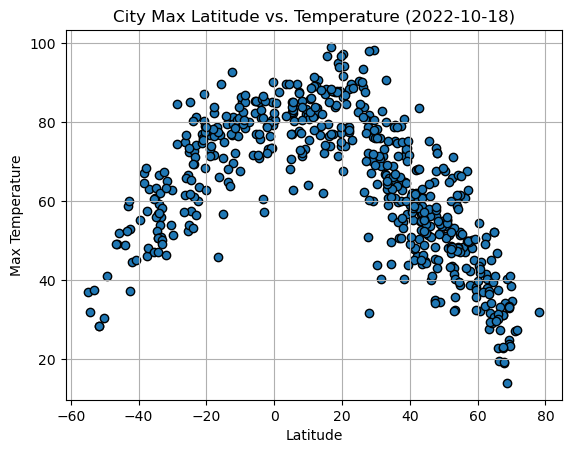

In [34]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.grid(True)
plt.show()

#### Latitude Vs. Humidity

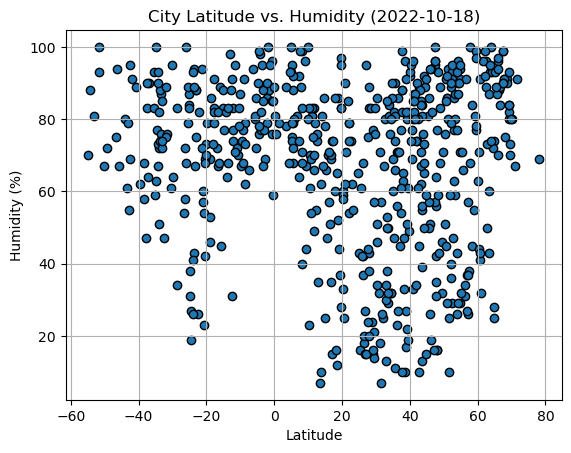

In [35]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.grid(True)
plt.show()

#### Latitude Vs. Cloudiness

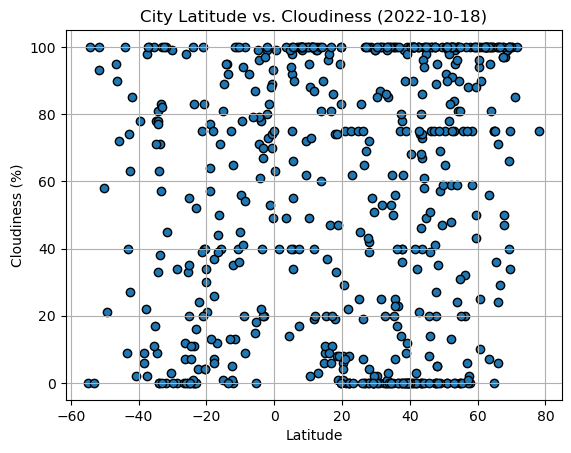

In [36]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

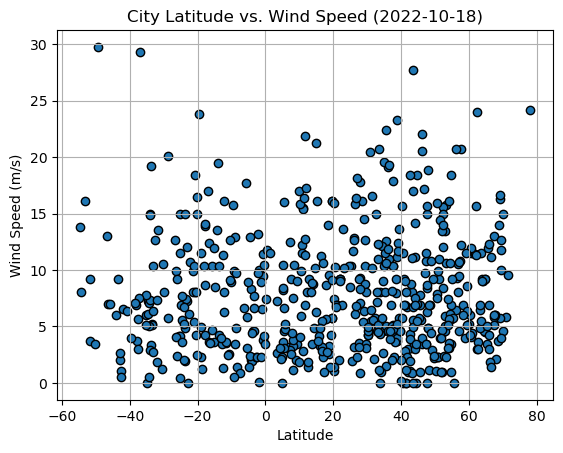

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.grid(True)
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [134]:
# Define a function to create Linear Regression plots
def lin_reg(df, y_value):
    x = df['Lat']
    y = df[y_value]
    slope, int, rvalue, pvalue, std_err = linregress(x, y)
    regress_values = slope*x+int
    plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
    plt.xlabel("Latitude")
    plt.ylabel(y_value)
#print the regression equation on plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
    plt.plot(x, regress_values, color='red')
    plt.annotate(line_eq, (6,10), fontsize=15, color="green")
    print(f"The r-value is: {rvalue**2}")
    plt.show()



In [135]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iskateley,67.6803,53.1512,19.02,91,50,5.99,RU,1715401527
3,college,64.8569,-147.8028,52.12,28,75,9.22,US,1715401529
4,utrik,11.2278,169.8474,81.52,81,100,15.48,MH,1715401529
5,stanley,54.8680,-1.6985,51.53,91,0,3.44,GB,1715401530
6,olonkinbyen,70.9221,-8.7187,27.01,67,85,5.82,SJ,1715401530


In [136]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cururupu,-1.8283,-44.8683,73.09,100,73,0.09,BR,1715401528
2,afaahiti,-17.7500,-149.2833,82.27,83,26,13.87,PF,1715401528
8,codrington,-38.2667,141.9667,67.05,58,6,6.89,AU,1715401531
9,fale old settlement,-9.3852,-171.2468,85.05,74,78,9.89,TK,1715401532
10,edinburgh of the seven seas,-37.0676,-12.3116,62.98,90,100,29.33,SH,1715401532


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7116553874844191


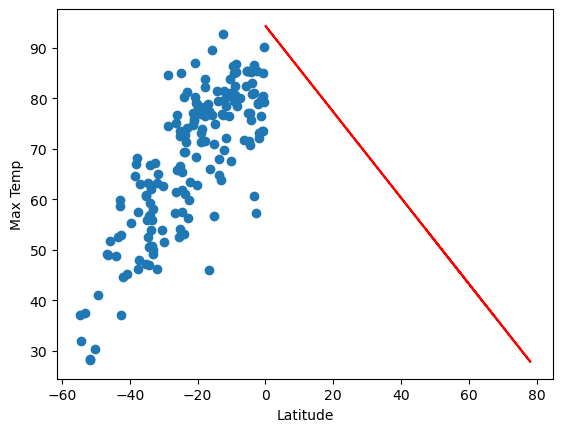

In [137]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df, 'Max Temp')
# plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")
# plt.plot(X, line_model, color='red')
# plt.show()

The r-value is: 0.6292535911693516


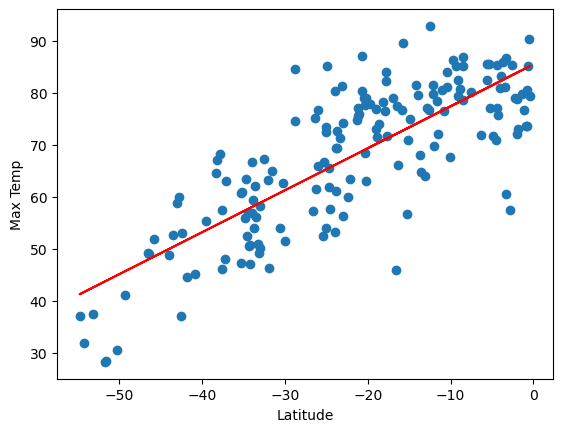

There is a relatively strong positive relationship between the proximity to the equator and latitude, the closer you get to the equator the higher the temperature


In [138]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, 'Max Temp')
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp")
#print the regression equation on plot
#print the r value
# plt.plot(X, line_model, color='red')
# plt.show()
print("There is a relatively strong positive relationship between the proximity to the equator and latitude, the closer you get to the equator the higher the temperature")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011145550653039783


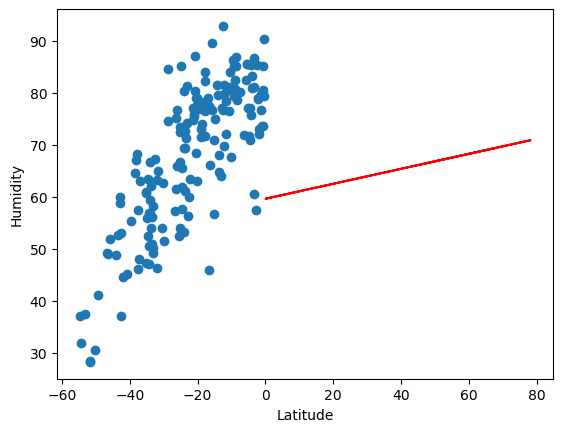

In [139]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Humidity')


The r-value is: 0.010443612572321792


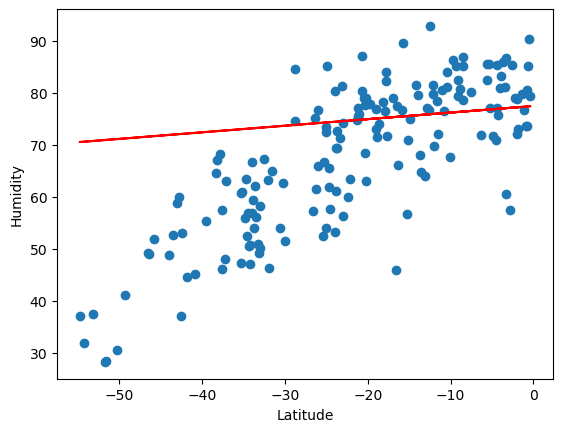

The is little to no correlation between proximity to the equator and the humidity present in the atmosphere


In [140]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Humidity')
print("The is little to no correlation between proximity to the equator and the humidity present in the atmosphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010215476284068903


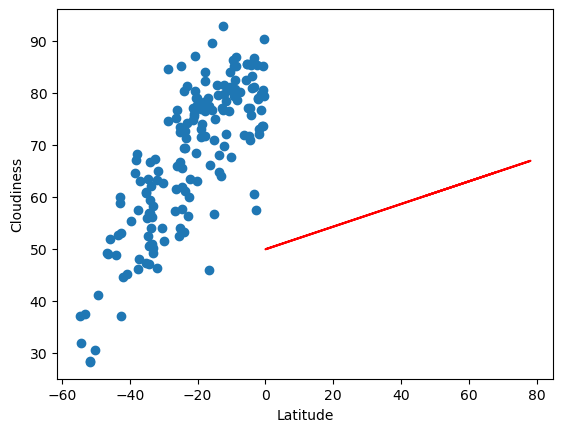

In [141]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Cloudiness')

The r-value is: 0.009406145409452468


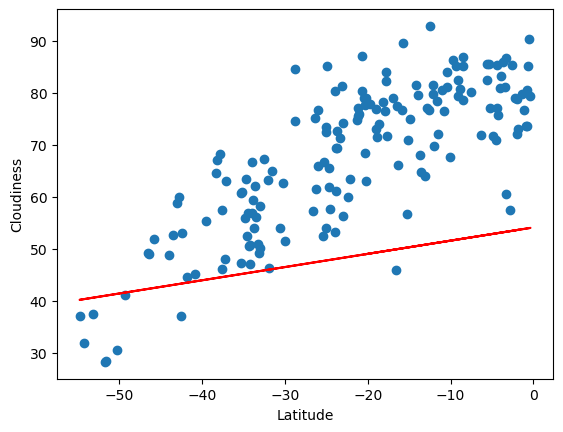

The is little to no correlation between proximity to the equator and cloud coverage


In [142]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Cloudiness')
print("The is little to no correlation between proximity to the equator and cloud coverage")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0014337978357560855


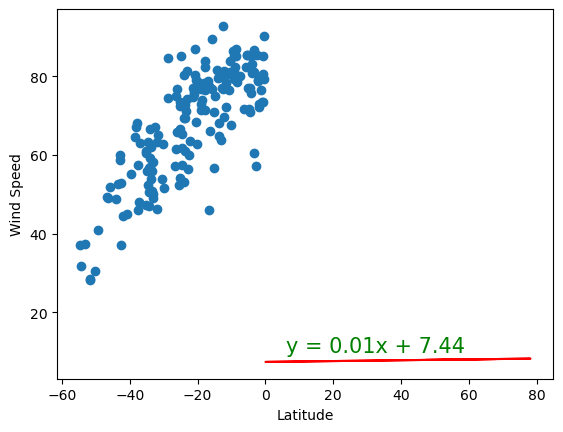

In [143]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Wind Speed')

The r-value is: 0.007011168366692026


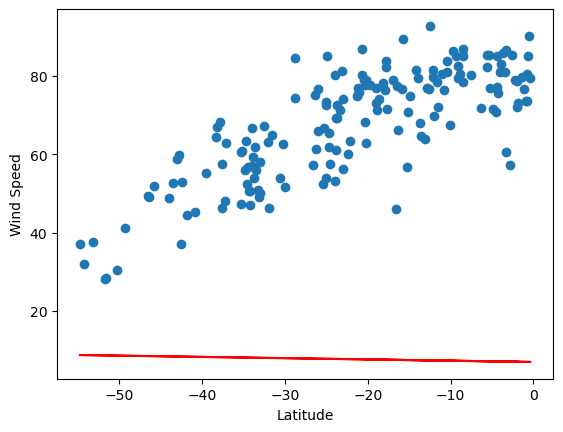

The is little to no correlation between proximity to the equator and the intensity of wind systems


In [144]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Wind Speed')
print("The is little to no correlation between proximity to the equator and the intensity of wind systems")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [145]:
#